In [46]:
import numpy as np
from oars.matrices import getFull
from oars.pep import getOptimalW, getContractionFactor, getContractionOptGamma
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
np.set_printoptions(precision=3, suppress=True, linewidth=200)
saving = True # whether to save figures

In [47]:
n = 4
Z, W = getFull(n)
results = defaultdict(list)
optimal_Ws = []
maxe = 10
kappas = [2**e for e in range(1,maxe+1)]
for e in range(maxe):
    k = 2**(e)
    ls = [k, 2, 2, np.inf]
    mus = [0.5, 1, 1, 0.0]

    tau = getContractionFactor(Z, W, ls=ls, mus=mus)
    results['Fixed W'].append(tau)
    tauWs, gammaWs = getContractionOptGamma(Z, W, ls=ls, mus=mus)
    results['Optimized Step'].append(tauWs)
    Wo, tau_w = getOptimalW(Z, ls=ls, mus=mus)
    results['Optimized Matrix'].append(tau_w)
    optimal_Ws.append(Wo)
    print(e, tau, tauWs, tau_w, gammaWs)


0 0.8484660926958232 0.7363368449493197 0.720725040298322 0.999996907722436
1 0.8907736366985421 0.8192890888037855 0.8131084704512709 0.9999954648216294
2 0.9497656627010875 0.9289771399484862 0.9242125728785553 0.9351164951864215
3 0.9842193447224068 0.9793966682727815 0.9788204137271695 0.8793111802804734
4 0.9957352173215994 0.9946050457348455 0.9945287692813491 0.8531443344822441
5 0.9989022787313732 0.9986310383320436 0.9986201833132309 0.8410165791799807
6 0.9997224643646524 0.9996558547604161 0.9996528851506343 0.8348587636867344
7 0.9999305016900635 0.9999142718276007 0.9999137772324223 0.8339074297060208
8 0.9999829876396757 0.99997882125203 0.9999788527945105 0.8289130555534101
9 0.9999958774858048 0.9999949175948158 0.9999948665169952 0.8248129500591234


In [48]:
optimal_Ws

[array([[ 1.606, -0.734, -0.377, -0.496],
        [-0.734,  1.986, -0.611, -0.641],
        [-0.377, -0.611,  1.732, -0.743],
        [-0.496, -0.641, -0.743,  1.88 ]]),
 array([[ 1.639, -0.425, -0.576, -0.638],
        [-0.425,  1.409, -0.344, -0.64 ],
        [-0.576, -0.344,  1.616, -0.695],
        [-0.638, -0.64 , -0.695,  1.973]]),
 array([[ 1.676, -0.484, -0.525, -0.666],
        [-0.484,  1.716, -0.592, -0.64 ],
        [-0.525, -0.592,  1.803, -0.686],
        [-0.666, -0.64 , -0.686,  1.992]]),
 array([[ 1.691, -0.507, -0.545, -0.639],
        [-0.507,  1.95 , -0.88 , -0.563],
        [-0.545, -0.88 ,  2.031, -0.605],
        [-0.639, -0.563, -0.605,  1.807]]),
 array([[ 1.667, -0.512, -0.54 , -0.616],
        [-0.512,  2.083, -1.041, -0.53 ],
        [-0.54 , -1.041,  2.139, -0.558],
        [-0.616, -0.53 , -0.558,  1.704]]),
 array([[ 1.655, -0.516, -0.538, -0.601],
        [-0.516,  2.077, -1.039, -0.522],
        [-0.538, -1.039,  2.121, -0.544],
        [-0.601, -0.522,

In [49]:
for i in range(len(optimal_Ws)-1):
    print(optimal_Ws[i+1] - optimal_Ws[i])

[[ 0.032  0.309 -0.199 -0.142]
 [ 0.309 -0.578  0.267  0.001]
 [-0.199  0.267 -0.116  0.048]
 [-0.142  0.001  0.048  0.093]]
[[ 0.037 -0.06   0.051 -0.028]
 [-0.06   0.307 -0.248  0.   ]
 [ 0.051 -0.248  0.188  0.009]
 [-0.028  0.     0.009  0.019]]
[[ 0.016 -0.023 -0.02   0.027]
 [-0.023  0.234 -0.288  0.077]
 [-0.02  -0.288  0.227  0.081]
 [ 0.027  0.077  0.081 -0.185]]
[[-0.024 -0.004  0.006  0.023]
 [-0.004  0.132 -0.161  0.033]
 [ 0.006 -0.161  0.108  0.047]
 [ 0.023  0.033  0.047 -0.103]]
[[-0.012 -0.004  0.001  0.015]
 [-0.004 -0.006  0.002  0.009]
 [ 0.001  0.002 -0.017  0.014]
 [ 0.015  0.009  0.014 -0.038]]
[[-0.003 -0.005 -0.001  0.008]
 [-0.005  0.193 -0.188 -0.001]
 [-0.001 -0.188  0.186  0.003]
 [ 0.008 -0.001  0.003 -0.01 ]]
[[-0.001  0.001 -0.001  0.001]
 [ 0.001 -0.156  0.152  0.002]
 [-0.001  0.152 -0.152  0.001]
 [ 0.001  0.002  0.001 -0.004]]
[[-0.005  0.004 -0.004  0.005]
 [ 0.004 -0.294  0.285  0.004]
 [-0.004  0.285 -0.277 -0.004]
 [ 0.005  0.004 -0.004 -0.006]]


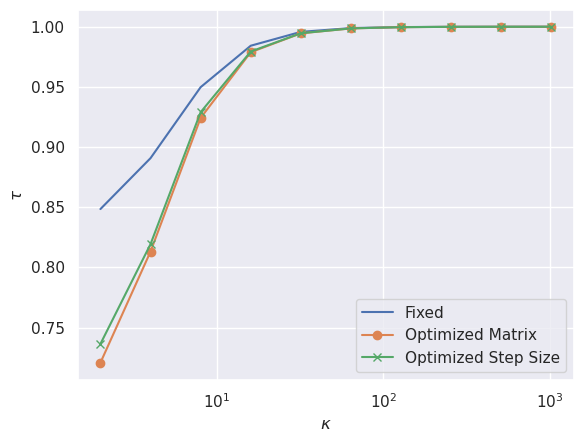

In [50]:

colors = ['r', 'g', 'b']
plt.plot(kappas, np.array(results['Fixed W']), label='Fixed')
plt.plot(kappas, np.array(results['Optimized Matrix']), marker='o', label='Optimized Matrix')
plt.plot(kappas, np.array(results['Optimized Step']), marker='x', label='Optimized Step Size')

plt.legend()
plt.xscale('log')
plt.xlabel('$\\kappa$')
plt.ylabel('$\\tau$')
if saving:
    import os
    if not os.path.exists('figs'): os.makedirs('figs')
    plt.savefig('figs/tau_kappa.pdf')

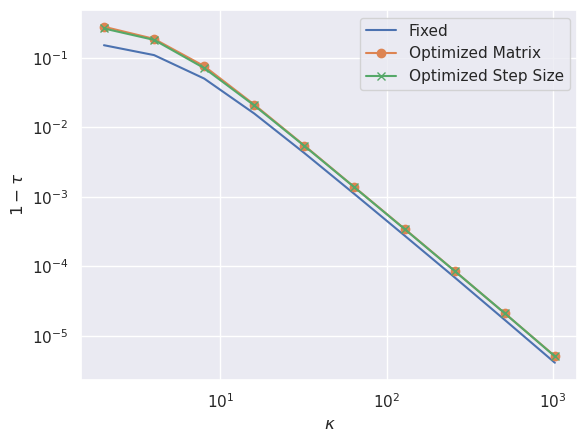

In [51]:
plt.plot(kappas, 1-np.array(results['Fixed W']), label='Fixed')
plt.plot(kappas, 1-np.array(results['Optimized Matrix']), marker='o', label='Optimized Matrix')
plt.plot(kappas, 1-np.array(results['Optimized Step']), marker='x', label='Optimized Step Size')

plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\\kappa$')
plt.ylabel('$1-\\tau$')
if saving: plt.savefig('figs/log_tau_kappa.pdf')

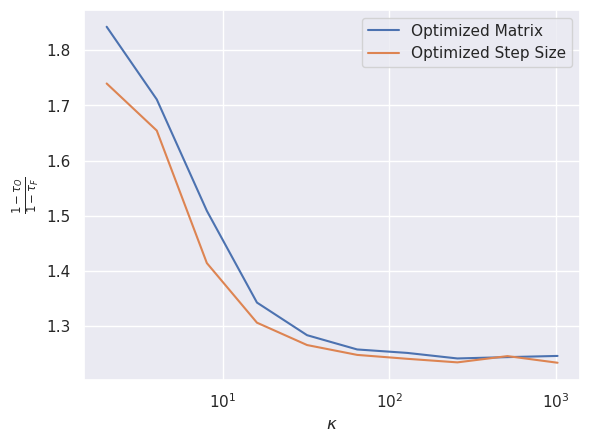

In [52]:

plt.plot(kappas, (1-np.array(results['Optimized Matrix']))/(1-np.array(results['Fixed W'])), label='Optimized Matrix')
plt.plot(kappas, (1-np.array(results['Optimized Step']))/(1-np.array(results['Fixed W'])), label='Optimized Step Size')

plt.legend()
plt.xscale('log')
plt.xlabel('$\\kappa$')
plt.ylabel('$\\frac{1-\\tau_O}{1-\\tau_F}$')
if saving:plt.savefig('figs/ratio_kappa.pdf')